# Solution of 2-D Poisson equation

We consider the Poisson equation
$$
        -(u_{xx} + u_{yy}) = f, \quad\textrm{in}\quad \Omega = [0,1] \times [0,1]
$$
with boundary condition
$$
u = 0, \quad\textrm{on}\quad \partial\Omega
$$
We will take
$$
f = 1
$$
Make a uniform grid with $n$ points in each direction, with spacing
$$
h = \frac{1}{n-1}
$$
The grid points are
$$
x_i = ih, \quad 0 \le i \le n-1
$$
$$
y_j = jh, \quad 0 \le j \le n-1
$$
The finite difference approximation at $(i,j)$ is
$$
-\frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} - \frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{\Delta y^2} = f_{i,j}, \qquad 1 \le i \le n-2, \quad 1 \le j \le n-2
$$

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def residual(u,f):
    n = u.shape[0]
    res = 0.0
    for i in range(1,n-1):
        for j in range(1,n-1):
            uxx = (u[i-1,j]-2*u[i,j]+u[i+1,j])/h**2
            uyy = (u[i,j-1]-2*u[i,j]+u[i,j+1])/h**2
            res += (uxx + uyy + f[i,j])**2
    return np.sqrt(res)

In [12]:
xmin,xmax = 0.0,1.0
n = 21
h = (xmax - xmin)/(n-1)
x = np.linspace(xmin,xmax,n)
X,Y = np.meshgrid(x,x)
f    = np.ones((n,n))

TOL   = 1.0e-6
itmax = 2000

## Gauss-Jacobi

Number of iterations = 1102


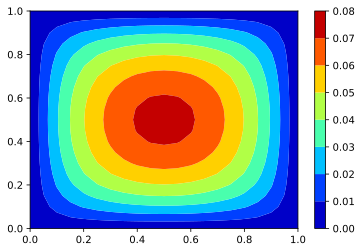

In [13]:
uold = np.zeros((n,n))
unew = np.zeros((n,n))
res0 = residual(unew,f)

for it in range(itmax):
    for i in range(1,n-1):
        for j in range(1,n-1):
            unew[i,j] = 0.25*(h**2 * f[i,j] \
                              + (uold[i-1,j] + uold[i+1,j] + uold[i,j-1] + uold[i,j+1]))
    uold[:,:] = unew
    res = residual(unew,f)
    if res < TOL * res0:
        break

print "Number of iterations = %d" % it
plt.contourf(X,Y,unew,cmap=plt.cm.jet)
plt.colorbar();

## Gauss-Seidel

Number of iterations = 552


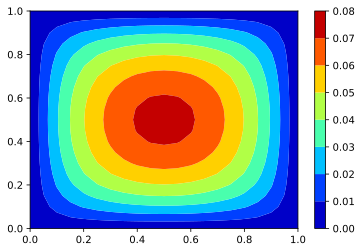

In [14]:
u    = np.zeros((n,n))
res0 = residual(u,f)

for it in range(itmax):
    for i in range(1,n-1):
        for j in range(1,n-1):
            u[i,j] = 0.25*(h**2 * f[i,j] \
                              + (u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1]))
    res = residual(u,f)
    if res < TOL * res0:
        break

print "Number of iterations = %d" % it
plt.contourf(X,Y,u,cmap=plt.cm.jet)
plt.colorbar();

## SOR

Number of iterations = 177


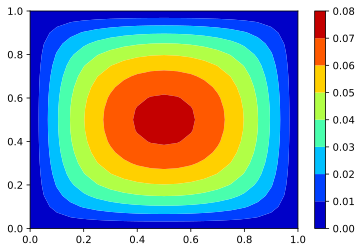

In [15]:
omega= 1.5
u    = np.zeros((n,n))
res0 = residual(u,f)

for it in range(itmax):
    for i in range(1,n-1):
        for j in range(1,n-1):
            z = 0.25*(h**2 * f[i,j] \
                       + (u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1]))
            u[i,j] = (1.0-omega)*u[i,j] + omega*z
    res = residual(u,f)
    if res < TOL * res0:
        break

print "Number of iterations = %d" % it
plt.contourf(X,Y,u,cmap=plt.cm.jet)
plt.colorbar();